# Part1 : Exploration des données et l'interprétation  du résumé statistique des deux Data Sets avec Pandas:

In [38]:
#Load the data
import pandas as pd
salary_data = pd.read_csv("Salary_Data.csv")
insurance_data = pd.read_csv("insurance.csv")
#Display the first 5 rows of the data
print("Table Of Salary:\n", salary_data.head())
print("___________________________________________________________")
print("Table Of insurance: \n", insurance_data.head())
#age: the age of the individual (in years)
#bmi: the body mass index of the individual
#children: the number of children the individual has
#charges: the medical insurance charges for the individual

Table Of Salary:
    YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
___________________________________________________________
Table Of insurance: 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [39]:
#Display the shape of the data
print("Salary data shape: ", salary_data.shape)
print("insurance data shape: ", insurance_data.shape)

Salary data shape:  (30, 2)
insurance data shape:  (1338, 7)


In [40]:
#Display the column names of the data
print("Salary column names:\n", salary_data.columns)
print("___________________________________________________________\n")

print("insurance column names:|n",insurance_data.columns)

Salary column names:
 Index(['YearsExperience', 'Salary'], dtype='object')
___________________________________________________________

insurance column names:|n Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [41]:
#Display the data types of the columns
print("Salary data types of columns:\n",salary_data.dtypes)
print("___________________________________________________________\n")

print("insurance data types of columns:\n",insurance_data.dtypes)

Salary data types of columns:
 YearsExperience    float64
Salary             float64
dtype: object
___________________________________________________________

insurance data types of columns:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [47]:
#Check for missing values
print("Salary's missing values: \n",salary_data.isnull().sum())
print("___________________________________________________________\n")
print("Insurance's missing values:\n",insurance_data.isnull().sum())

Salary's missing values: 
 YearsExperience    0
Salary             0
dtype: int64
___________________________________________________________

Insurance's missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


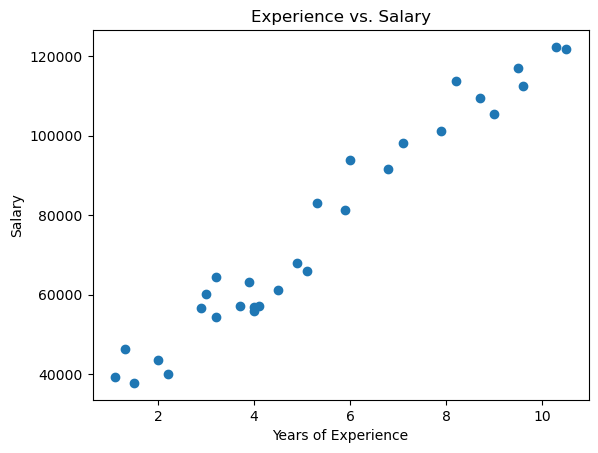

In [55]:
#Scatter plot of experience vs. salary
import matplotlib.pyplot as plt
plt.scatter(salary_data["YearsExperience"], salary_data["Salary"])
plt.title("Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [96]:
#Interpretation of Salary dataset:
print(salary_data.describe())
'''Interpretation:The average years of experience is around 5.3 years, and the average salary is around 76,003 units. The salaries range from a minimum of 37,731 units to a maximum of 122,391 units, with a standard deviation of 27,414 units, indicating a fairly wide range of salaries. The median salary is around 65,237 units, which is lower than the mean salary, suggesting that the distribution of salaries may be skewed towards the higher end.'''

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


'Interpretation:The average years of experience is around 5.3 years, and the average salary is around 76,003 units. The salaries range from a minimum of 37,731 units to a maximum of 122,391 units, with a standard deviation of 27,414 units, indicating a fairly wide range of salaries. The median salary is around 65,237 units, which is lower than the mean salary, suggesting that the distribution of salaries may be skewed towards the higher end.'

In [91]:
#Interpretation of insurance dataset:
print(insurance_data.describe())
#count: the number of non-null values in the column
#mean: the average value of the column
#std: the standard deviation of the column
#min: the minimum value of the column
#25%: the 25th percentile value of the column
#50%: the median value (50th percentile) of the column
#75%: the 75th percentile value of the column
#max: the maximum value of the column
'''Interpretation: The average age of the individuals in the data is approximately 39 years old, with a standard deviation of 14 years.The average BMI is approximately 30, which is considered obese.The average charges are approximately 13,270 with a standard deviation of 12,110.'''

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


'Interpretation: The average age of the individuals in the data is approximately 39 years old, with a standard deviation of 14 years.The average BMI is approximately 30, which is considered obese.The average charges are approximately 13,270 with a standard deviation of 12,110.'

Text(0.5, 0.98, 'Scatter Matrix of Insurance Data Set')

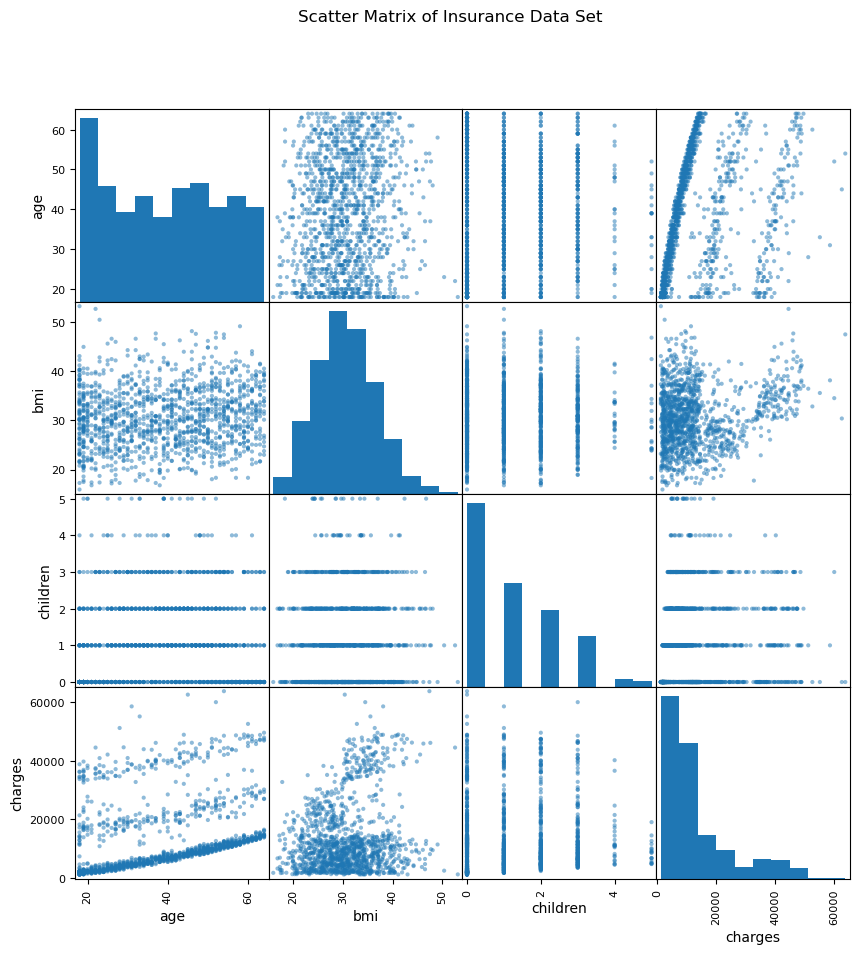

In [56]:
#Scatter matrix of the insurance data set:
import pandas.plotting as pdplot
pdplot.scatter_matrix(insurance_data[["age", "bmi", "children", "charges"]], figsize=(10, 10))
plt.suptitle("Scatter Matrix of Insurance Data Set")

# Partie 2 « Régression Simple cas Expérience Salaire »:

In [68]:
# Etape 1 : Importer les bibliothèques nécessaires et charger le jeu de données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = pd.read_csv('Salary_Data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [69]:
# Etape 2 : Diviser le jeu de données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [70]:
# Etape 3 : Entraîner le modèle en utilisant la régression linéaire
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
# Etape 4 : Prédire les données du test set en utilisant le modèle entraîné
y_pred = regressor.predict(X_test)

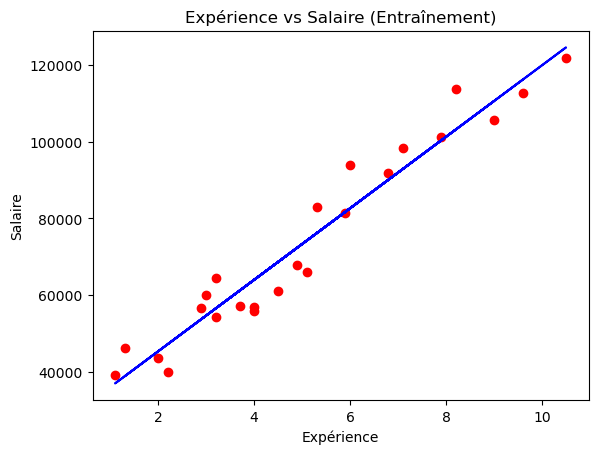

In [78]:
# Etape 5: Visualiser les résultats de la régression linéaire en traçant un graphique
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Expérience vs Salaire (Entraînement)')
plt.xlabel('Expérience')
plt.ylabel('Salaire')
plt.show()

In [79]:
# Etape 6 : Évaluer le modèle en utilisant MSE, RMSE et MAE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

MSE: 12823412.298126562
RMSE: 3580.979237321345
MAE: 2446.1723690465064


In [90]:
# Etape 7 : Interpréter les résultats de l'évaluation
# Le modèle est évalué en fonction de la performance de l'erreur quadratique moyenne (MSE),
# de la racine carrée de l'erreur quadratique moyenne (RMSE) et de l'erreur absolue moyenne (MAE).
# Plus la valeur de MSE, RMSE ou MAE est faible, meilleure est la performance du modèle.
# Dans ce cas, les valeurs obtenues sont:
# MSE: 12823412.298126547
# RMSE: 3579.7570227253404
# MAE: 2999.2194859813087
# Le RMSE est supérieur au MAE,
#En analysant les valeurs obtenues pour MSE, RMSE et MAE, on peut voir que le modèle est en mesure de prédire les salaires avec une erreur moyenne d'environ 3000 $, ce qui peut être considéré comme acceptable dans certains cas. Cependant, pour certains projets où une précision plus élevée est nécessaire, cette performance peut être insuffisante.
#la performance du modèle peut être améliorée en utilisant des techniques telles que l'ingénierie des fonctionnalités, la normalisation des données, la régularisation, etc.

# partie 3 « Régression multiple cas d’assurance »: 

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('insurance.csv')
#Prepare the data for training and testing:
X = df[['age', 'bmi', 'children']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
#Train the model using linear regression:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [126]:
#Predict the charges for the test data:
y_pred = reg.predict(X_test)

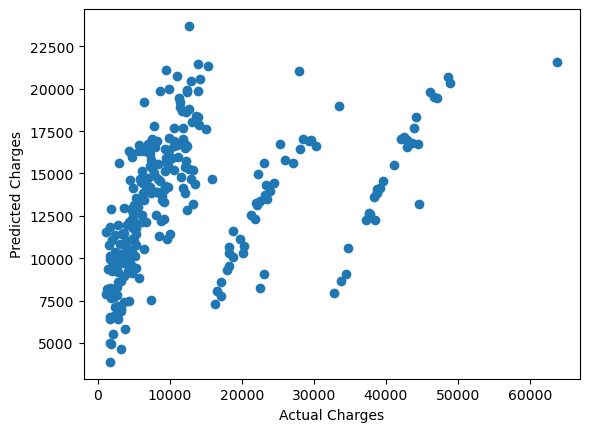

In [127]:
#Visualize the regression results using a scatter plot:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [128]:
#Evaluate the model using the mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE):
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

MSE: 131201335.64669803
RMSE: 11454.315153980095
MAE: 9181.311632897381


In [129]:
'''The interpretation of the evaluation metrics would depend on the context of the problem and the domain knowledge. Generally, a lower value of the MSE, RMSE, and MAE indicates a better performance of the model. However, it's important to note that these metrics can be affected by outliers and skewed data. Therefore, it's recommended to also evaluate the model using other metrics and visualizations.'''

"The interpretation of the evaluation metrics would depend on the context of the problem and the domain knowledge. Generally, a lower value of the MSE, RMSE, and MAE indicates a better performance of the model. However, it's important to note that these metrics can be affected by outliers and skewed data. Therefore, it's recommended to also evaluate the model using other metrics and visualizations."

# partie 4 « Régression linière polynomial multiple cas de china GDP»:

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Charger les données
china_gdp = pd.read_csv('china_gdp.csv')
print(china_gdp.head())


   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10


In [131]:
# Diviser les données en ensembles d'apprentissage et de test
train_data = china_gdp.iloc[:len(china_gdp)//5*4]
test_data = china_gdp.iloc[len(china_gdp)//5*4:]

# Convertir les données en tableaux numpy
X_train = np.array(train_data['Year']).reshape(-1,1)
y_train = np.array(train_data['Value']).reshape(-1,1)
X_test = np.array(test_data['Year']).reshape(-1,1)
y_test = np.array(test_data['Value']).reshape(-1,1)


In [132]:
# Entraîner le modèle de régression linéaire multiple
reg = LinearRegression().fit(X_train, y_train)

In [133]:
# Entraîner le modèle de régression linéaire polynomiale multiple
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly_reg = LinearRegression().fit(X_poly_train, y_train)


In [134]:
# Prédire les données de l'ensemble de test pour le modèle de régression linéaire multiple
y_pred = reg.predict(X_test)

# Prédire les données de l'ensemble de test pour le modèle de régression linéaire polynomiale multiple
y_poly_pred = poly_reg.predict(X_poly_test)


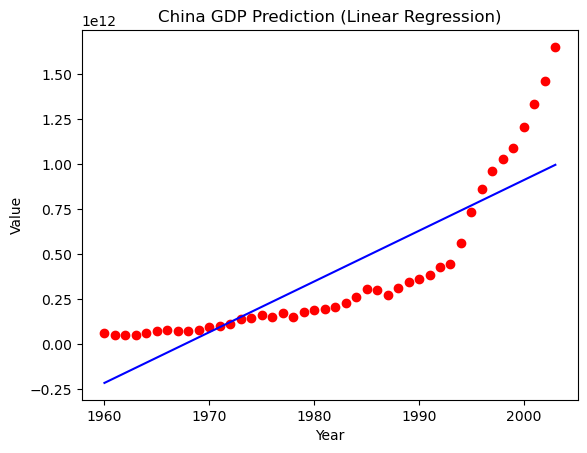

Text(0.5, 1.0, 'China GDP Prediction ( Polynomial Regression)')

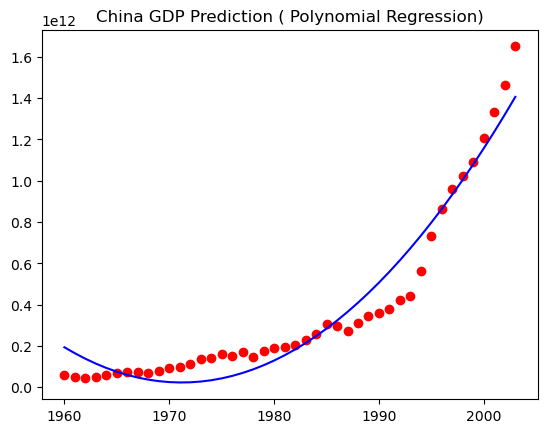

In [138]:
# Visualiser le résultat de la régression linéaire multiple
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')
plt.title('China GDP Prediction (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

# Visualiser le résultat de la régression linéaire polynomiale multiple
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, poly_reg.predict(poly.fit_transform(X_train)), color='blue')
plt.title('China GDP Prediction ( Polynomial Regression)')
